In [1]:
from ising import Trajectory, filter_trajectories
import numpy as np
from matplotlib import pyplot as plt

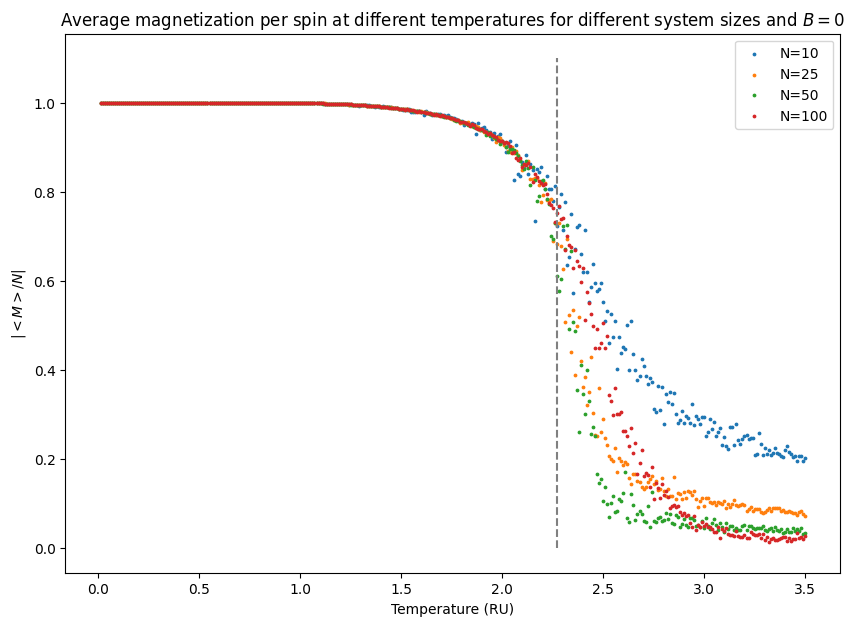

In [44]:
Ns = [10, 25, 50, 100]

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

for N in Ns:

    filtered_trajectories = filter_trajectories(N=N, J=1, B=0, temperature=(0, 3.55), folder="ising_analysis_traj")

    temperatures = []
    magnetizations = []

    for name, params in filtered_trajectories.items():
        temperatures.append(params["temperature"])
        trajectory = Trajectory.from_file(name)
        magnetizations.append(trajectory.magnetization(r_equil=0.2, abs=True, n_blocks=1))

    indices = np.argsort(temperatures)

    ax.scatter(np.array(temperatures)[indices], np.array(magnetizations)[indices], label=f"N={N}", s=3)

ax.vlines(x=2.269185, ymin=0.0, ymax=1.1, ls="--", color="gray", label="$T_c = 2.269185$")

ax.set_title("Average magnetization per spin at different temperatures for different system sizes and $B = 0$")
ax.set_xlabel("Temperature (RU)")
ax.set_ylabel("$|<M>/N|$")

ax.legend()

plt.show()

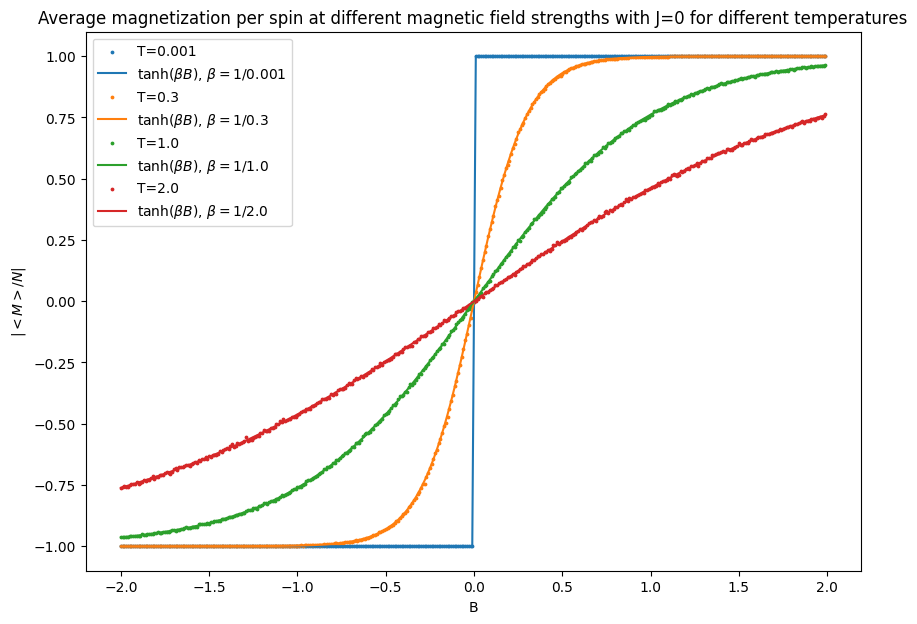

In [43]:
temperatures = [0.001, 0.3, 1.0, 2.0]

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

for temperature in temperatures:

    filtered_trajectories = filter_trajectories(N=10, J=0, B=(-2, 2), temperature=temperature, folder="ising_analysis_traj")

    Bs = []
    magnetizations = []

    for name, params in filtered_trajectories.items():
        Bs.append(params["B"])
        trajectory = Trajectory.from_file(name)
        magnetizations.append(trajectory.magnetization(r_equil=0.2, abs=False, n_blocks=1))

    indices = np.argsort(Bs)

    ax.scatter(np.array(Bs)[indices], np.array(magnetizations)[indices], label=f"T={temperature}", s=3)

    x = np.arange(-2, 2, 0.01)
    ax.plot(x, np.tanh(1/temperature * x), label=r"$\tanh(\beta B)$, $\beta = 1/" + str(temperature) + r"$")

ax.set_title("Average magnetization per spin at different magnetic field strengths with J=0 for different temperatures")
ax.set_xlabel("B")
ax.set_ylabel("$|<M>/N|$")

ax.legend()

plt.show()